This is example is mainly intended to provide code snippets about beam shapes.
It contains a snippet for plotting beam shapes, plots of the modes, a Gaussian beam definition and examples how to calculate the matching integral between two beam shapes.

This code snippets are not included in `BoostFractor`, since they are not directly relevant for the algorithms, and in order to make it more flexible for you to adapt to your needs.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Requriements" data-toc-modified-id="Requriements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Requriements</a></span><ul class="toc-item"><li><span><a href="#Plotting-Requirements" data-toc-modified-id="Plotting-Requirements-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Plotting Requirements</a></span></li><li><span><a href="#BoostFractor-Requirements" data-toc-modified-id="BoostFractor-Requirements-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>BoostFractor Requirements</a></span></li></ul></li><li><span><a href="#Plotting-Beam-Shapes" data-toc-modified-id="Plotting-Beam-Shapes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting Beam Shapes</a></span><ul class="toc-item"><li><span><a href="#Code-Snippet-for-Beam-Shape-Plot" data-toc-modified-id="Code-Snippet-for-Beam-Shape-Plot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Code Snippet for Beam Shape Plot</a></span></li></ul></li><li><span><a href="#Plot-some-Modes" data-toc-modified-id="Plot-some-Modes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot some Modes</a></span><ul class="toc-item"><li><span><a href="#Different-azimuthally-symmetric-modes" data-toc-modified-id="Different-azimuthally-symmetric-modes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Different azimuthally symmetric modes</a></span></li><li><span><a href="#Uniform-Beam" data-toc-modified-id="Uniform-Beam-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Uniform Beam</a></span></li><li><span><a href="#Superposition-of-non-azimuthal-symmetric-modes" data-toc-modified-id="Superposition-of-non-azimuthal-symmetric-modes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Superposition of non-azimuthal symmetric modes</a></span></li></ul></li><li><span><a href="#Gaussian-Beam" data-toc-modified-id="Gaussian-Beam-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gaussian Beam</a></span><ul class="toc-item"><li><span><a href="#Definition-Code-Snippet" data-toc-modified-id="Definition-Code-Snippet-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Definition Code Snippet</a></span></li><li><span><a href="#Plot-Example" data-toc-modified-id="Plot-Example-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Plot Example</a></span></li></ul></li><li><span><a href="#Matching-Integrals" data-toc-modified-id="Matching-Integrals-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Matching Integrals</a></span></li></ul></div>

## Requriements

### Plotting Requirements

In [2]:
using PyCall
using PyPlot;
patch = pyimport("matplotlib.patches");

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/diehl/.julia/packages/PyPlot/XHEG0/src/init.jl:192


### BoostFractor Requirements
We will use the `transformer` implementation below to get some beam shapes of different modes, and combination of modes.

In [2]:
# If you installed BoostFractor
using BoostFractor

┌ Info: Precompiling BoostFractor [222d2961-0b53-58be-99ce-9613a82efb32]
└ @ Base loading.jl:1260


In [3]:
# If you just downloaded the githup repository and do not want to install the package
begin
    push!(LOAD_PATH, "../src");
    using BoostFractor;
end

## Plotting Beam Shapes

### Code Snippet for Beam Shape Plot

In [4]:
function power_pattern_cuts(eout;radius=0.15,plottitle="", zlabel="Local Normalized Power \$\\propto \\left|{E}\\right|^2\$ [a.u.]", 
        plotcuts=true, dx=0.007, X = -0.4445:dx:0.4445)
    figure(figsize=(5.5,5) )
    
    ax2 = nothing
    ax3 = nothing
    powerpattern = abs2.(transpose(eout))
    max = maximum(powerpattern)
    
    if plotcuts
        ax2 = subplot2grid((10,11),(8,0), colspan=8, rowspan=2)
        plot(X, powerpattern[Int(ceil(length(X)/2)),:] )
        xlim((-0.2,0.2))
        ylim((-max*0.05,max*1.05))
        xlabel("x [m]")
        ylabel("\$\\left|{E}\\right|^2\$\n[a.u.]")
        grid(alpha=0.5, linewidth=1)
        ax3 = subplot2grid((10,11),(0,8), rowspan=8, colspan=2)
        plot(powerpattern[:,Int(ceil(length(X)/2))], X)
        ylim((-0.2,0.2))
        xlim((-max*0.05,max*1.05))
        xlabel("\$\\left|{E}\\right|^2\$\n[a.u.]")
        grid(alpha=0.5, linewidth=1)
    end
    
    ax1 = subplot2grid((10,11),(0,0), colspan=8, rowspan=8, sharex=ax2, sharey=ax3)
    imshowresult = imshow(powerpattern, interpolation="bessel" , extent=[minimum(X),maximum(X),maximum(X),minimum(X)], aspect="auto") #
    c = patch.Circle((0,0),radius=radius, color="white", fill=false, linewidth=0.5)
    gca().add_artist(c)
    xlim((-1.25*radius,1.25*radius))
    ylim((-1.25*radius,1.25*radius))
    axvline(x=X[Int(ceil(length(X)/2))], color="white", linewidth=0.5, alpha=0.5)
    axhline(y=X[Int(ceil(length(X)/2))], color="white", linewidth=0.5, alpha=0.5)
    
    ax1.tick_params(labelbottom=false)    
    ax3.tick_params(labelleft=false)
    
    ylabel("y [m]")
    title(plottitle)
    
    ax4 = subplot2grid((10,11),(0,10), rowspan=8)
    colorbar(imshowresult, label=zlabel, cax=ax4)
    
    sca(ax1)
end

power_pattern_cuts (generic function with 1 method)

## Plot some Modes

### Different azimuthally symmetric modes

In [5]:
# Coordinate System
dx = 0.007
X = -0.4445:dx:0.4445
Y = -0.4445:dx:0.4445

coords = SeedCoordinateSystem(X=X, Y=Y)

CoordinateSystem([-0.4445, -0.4375, -0.4305, -0.4235, -0.4165, -0.4095, -0.4025, -0.3955, -0.3885, -0.3815  …  0.3815, 0.3885, 0.3955, 0.4025, 0.4095, 0.4165, 0.4235, 0.4305, 0.4375, 0.4445], [-0.4445, -0.4375, -0.4305, -0.4235, -0.4165, -0.4095, -0.4025, -0.3955, -0.3885, -0.3815  …  0.3815, 0.3885, 0.3955, 0.4025, 0.4095, 0.4165, 0.4235, 0.4305, 0.4375, 0.4445], [-448.79895051282756, -441.73125050475153, -434.6635504966755, -427.59585048859947, -420.52815048052344, -413.4604504724474, -406.39275046437143, -399.3250504562954, -392.25735044821937, -385.18965044014334  …  385.1896504401434, 392.2573504482193, 399.32505045629534, 406.3927504643714, 413.4604504724474, 420.52815048052344, 427.59585048859947, 434.6635504966755, 441.73125050475153, 448.79895051282756], [-448.79895051282756, -441.73125050475153, -434.6635504966755, -427.59585048859947, -420.52815048052344, -413.4604504724474, -406.39275046437143, -399.3250504562954, -392.25735044821937, -385.18965044014334  …  385.18965044014

In [6]:
# Modes
Mmax=7
Lmax=0
modes = SeedModes(coords,ThreeDim=true,Mmax=Mmax,Lmax=Lmax,diskR=0.15);

$m = 1$:

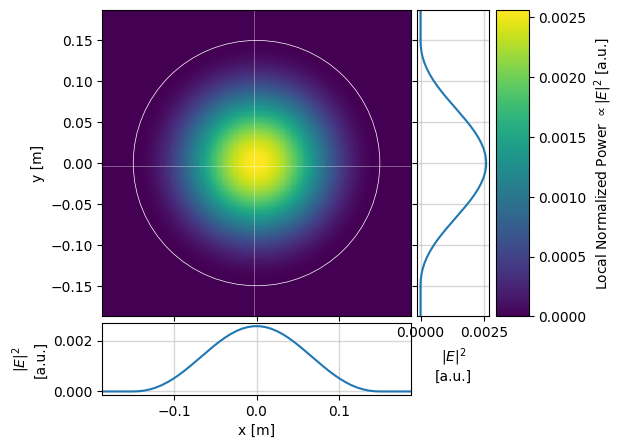

In [8]:
# Convert mode-vector to (x,y)-field distribution
beamshape_mode1 = modes2field([1. 0. 0. 0. 0. 0. 0.], coords, modes);
# Plot the field distribution (power)
power_pattern_cuts(beamshape_mode1[:,:,1];X=X,dx=dx)

$m = 2$:

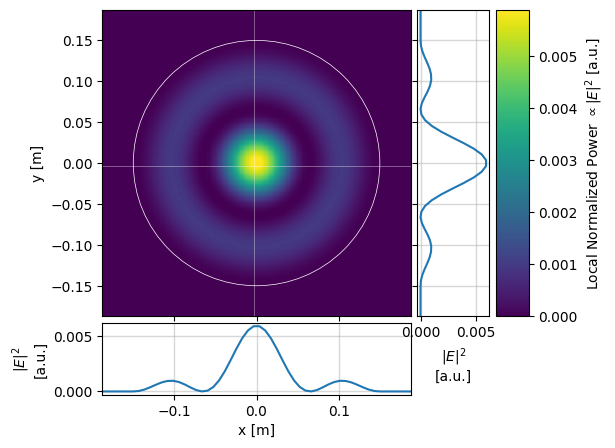

In [9]:
# Convert mode-vector to (x,y)-field distribution
beamshape_mode2 = modes2field([0. 1. 0. 0.  0. 0. 0.], coords, modes);
# Plot the field distribution (power)
power_pattern_cuts(beamshape_mode2[:,:,1];X=X,dx=dx)

$m = 3$:

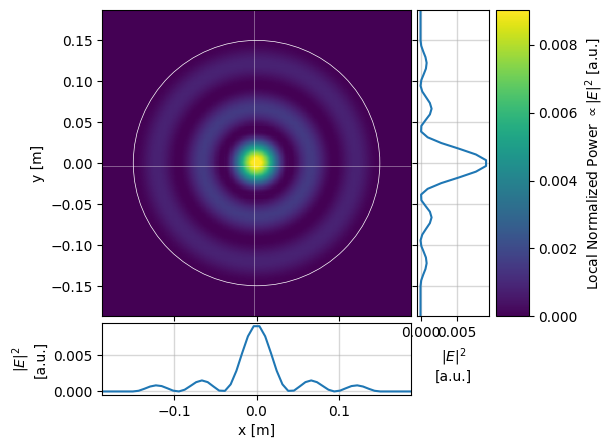

In [10]:
# Convert mode-vector to (x,y)-field distribution
beamshape_mode3 = modes2field([0. 0. 1. 0. 0. 0. 0.], coords, modes);
# Plot the field distribution (power)
power_pattern_cuts(beamshape_mode3[:,:,1];X=X,dx=dx)

### Uniform Beam

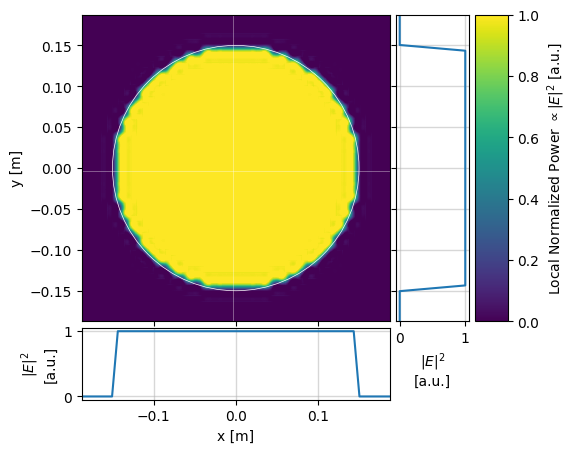

In [11]:
# Extreme Case: Uniform Beam
uniform_beam = [x^2 + y^2 > 0.15^2 ? 0. : 1. for x in coords.X, y in coords.Y]
power_pattern_cuts(uniform_beam;X=X,dx=dx)

In [12]:
# Get Modes excited by this
m_vector = field2modes(uniform_beam, coords, modes;diskR=0.15)

7-element Array{Complex{Float64},1}:
   0.8335534686718068 + 0.0im
 -0.36312412240281916 + 0.0im
  0.23161492098653047 + 0.0im
 -0.16996293661795037 + 0.0im
   0.1342075480993116 + 0.0im
 -0.11086669145145528 + 0.0im
  0.09443051604610854 + 0.0im

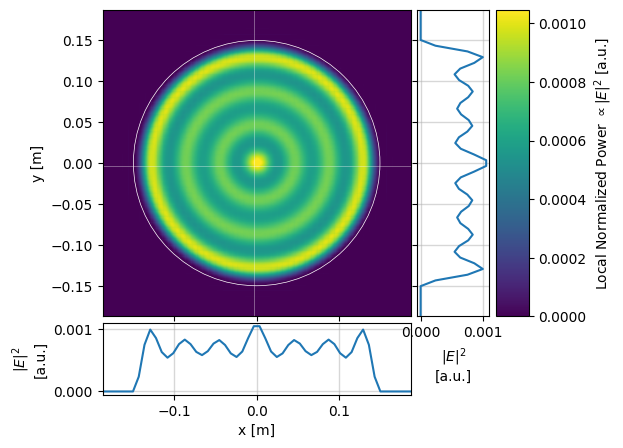

In [14]:
# Let's see what the beam shape looks like if we neglect higher modes now
beamshape_modeX = modes2field(m_vector, coords, modes);
# Plot the field distribution (power)
power_pattern_cuts(beamshape_modeX[:,:,1];X=X,dx=dx)

Note: Of course, it is not relevant for the mode matching to work that the beam shape that the axion-induced field excites is exactly represented by the modes. This holds, if the higher modes are not boosted at the frequencies considered due to their lower $k_z$ or if the diffraction loss of them is so high that they decay before they leave the system. To see if higher modes are actually relevant, run the code with higher modes included and see if the output beam contains higher modes.

### Superposition of non-azimuthal symmetric modes

Consider the $\ell = -1$ and $\ell = 1$ modes. Their sum is proportional to
    \begin{align}
        \exp(-i \Phi) + \exp(i \Phi) = 2 \cos(\Phi).
    \end{align}
    
Let's plot this.

In [20]:
# Add non-azimuthal-symmetric patterns
Mmax = 2
Lmax = 1
modes = SeedModes(coords,ThreeDim=true,Mmax=Mmax,Lmax=Lmax,diskR=0.15);

$m = 1$:

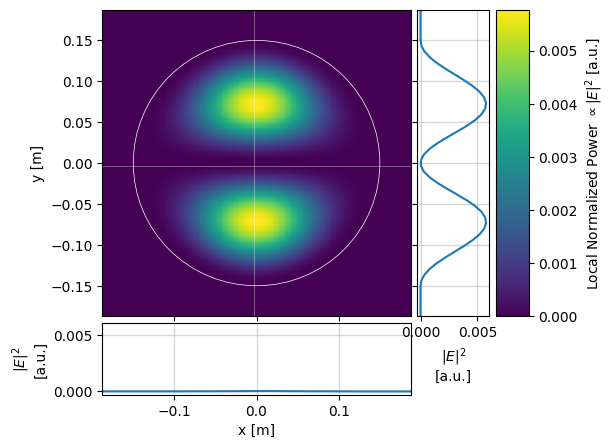

In [21]:
# Create the beam shape representing this mode combination
beamshape_modeX = modes2field([1. 0. 1.0 0. 0. 0.], coords, modes);
# Plot the field distribution (power)
power_pattern_cuts(beamshape_modeX[:,:,1];X=X,dx=dx)

$m = 2$:

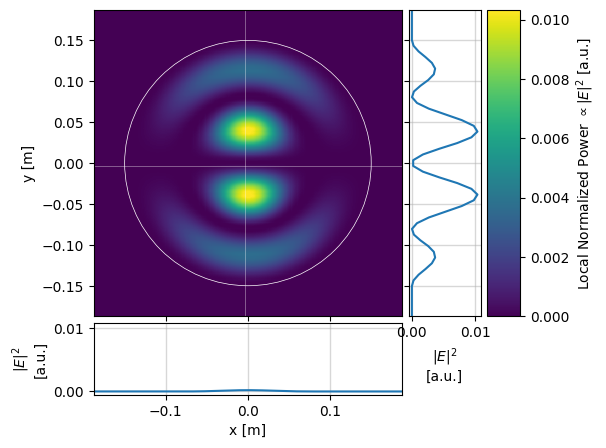

In [23]:
# Create the beam shape representing this mode combination
beamshape_modeX = modes2field([0. 0. 0. 1. 0. 1.0], coords, modes);
# Plot the field distribution (power)
power_pattern_cuts(beamshape_modeX[:,:,1];X=X,dx=dx)

$m = 1$: (but now take the difference, i.e. get $\sin$)

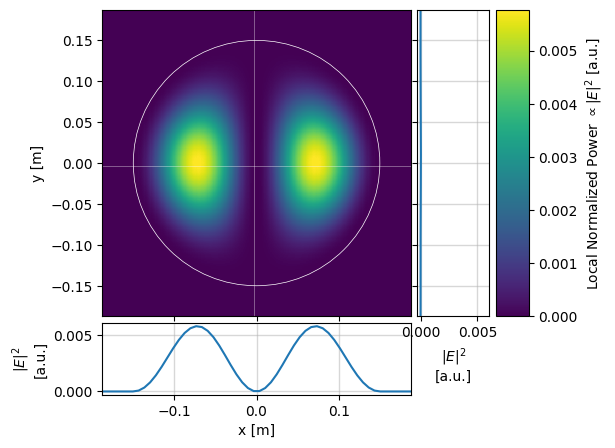

In [24]:
# Create the beam shape representing this mode combination
beamshape_modeX = modes2field([1. 0. -1.0 0. 0. 0.], coords, modes);
# Plot the field distribution (power)
power_pattern_cuts(beamshape_modeX[:,:,1];X=X,dx=dx)

## Gaussian Beam

### Definition Code Snippet

A Gaussian beam is given by https://en.wikipedia.org/wiki/Gaussian_beam

\begin{align}
{E} \left(r,z\right) = \frac{\omega_0}{\omega(z)} \exp \left[- \frac{r^2}{\omega^2(z)}\right] \exp \left[ - i \left(\frac{kr^2}{2 R(z)} - \tan^{-1} \frac{z}{z_R} \right) \right] \exp \left(- ikz \right) {\hat{e_y}}
\end{align}
    
with the radial distance from the beam axis $r =  \sqrt{x^2 + y^2}$ and the wavenumber $k = 2 \pi / \lambda$ and

\begin{align}
\omega(z) = \omega_0 \sqrt{1 + \left(\frac{z}{z_R}\right)^2 } \quad;\quad
R(z) = z \left[{1 + \left(\frac{z_R}{z}\right)^2 }\right] \quad;\quad
z_R = \frac{\pi {\omega_0}^2}{\lambda},  \label{eq:exp-coupling-beamproperties}
\end{align}
    
where  $\omega(z)$ is the beam width equal to two standard deviations of the Gaussian intensity distribution, $R(z)$ is the curvature radius of the beam, and $z_R$ is called the Rayleigh length and determines the range within the beam width does not open by more than a factor of $\sqrt{2}$.
Note: Knirck-Thesis (6.23) contains typos. The version here is correct.

### Plot Example

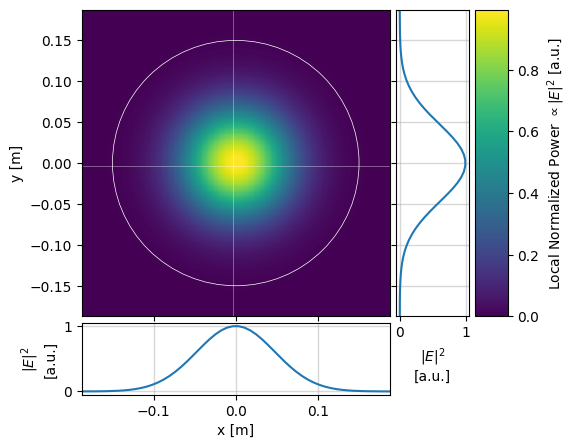

In [25]:
power_pattern_cuts(gauss_profile(coords;z = 1e-9, omega0 = 0.095, f = 22e9),radius=0.15)

The modes are quite good in approximating a Gaussian beam shape. For example:

In [26]:
Mmax = 4
Lmax = 0
modes = SeedModes(coords,ThreeDim=true,Mmax=Mmax,Lmax=Lmax,diskR=0.15);

In [27]:
gaussian_shape = gauss_profile(coords;z = 1e-9, omega0 = 0.097, f = 22e9);

In [28]:
m_inc = field2modes(gaussian_shape, coords, modes)

4-element Array{Complex{Float64},1}:
    0.9945770858257306 - 4.583548516961591e-7im
   0.07020402145712329 - 3.2160048755019136e-8im
   0.03862525449636099 - 1.7837789957378338e-8im
 -0.030554495720935302 + 1.4111907239171797e-8im

Beam Shape given by those modes:

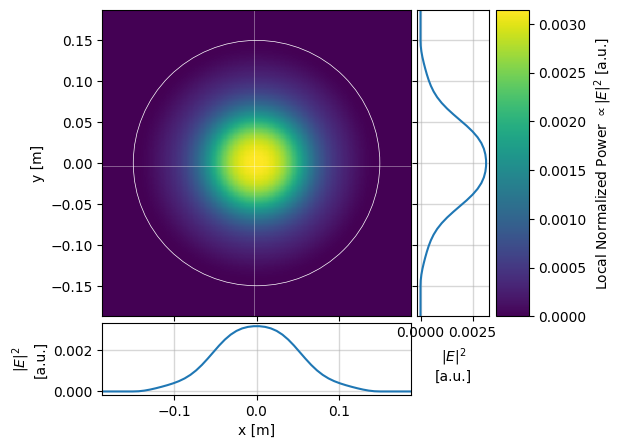

In [30]:
approximated_shape = modes2field(m_inc, coords, modes)
power_pattern_cuts(approximated_shape[:,:,1],radius=0.15,X=X)

## Matching Integrals

It is relatively straight forward to write the matching integrals in Julia. Just don't mess up the normalization...

\begin{align}
c &= \frac{ \int dA ~ {E}_{\rm B}^* \cdot {E}_{\rm A}}{ \sqrt{\int dA \left|{E}_{\rm B}\right|^2  \int dA \left|{E}_{\rm A}\right|^2 } }.
\end{align}
To implement this, it is usually convenient to realize that when implementing the integrals as discrete sums  the $d A$ cancel out.


So let's see how well the Gaussian beam above and the mode approximation above match.

In [31]:
c = sum(conj.(gaussian_shape) .* approximated_shape ) 
c /= sqrt(sum(abs2.(gaussian_shape)) * sum(abs2.(approximated_shape)))
power_matching = abs2(c)
println("The power matching is: $power_matching.")

The power matching is: 0.9965372680687604.
